In [17]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd

import ephem
from datetime import datetime, time, timedelta
from scipy import optimize
from mpl_toolkits.basemap import Basemap

import diurnal_config
import pickle

from diurnal_utils import *
from fetch_model_helper import *

In [49]:
%run diurnal_utils.py

In [156]:
pickle_path = '/export/data1/cchristo/diurnal_analysis_results/CMIP6_bin_pt2_hr_round_closest_gpm_overlap_2_modes_test/scrap/mm.pickle'
with open(pickle_path, 'rb') as f: 
    hour_means, hour_bins = pickle.load(f)

In [122]:
%run diurnal_utils.py
# res = cos_fit_2_mode_grid_average(hour_means, hour_bins)
res2 = cos_fit_2_mode_grid_average(hour_means, hour_bins)

100%|██████████| 86/86 [00:20<00:00,  4.23it/s]


In [21]:
mm = np.nanmean(hour_means, axis = 0)

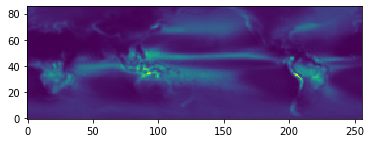

In [22]:
plt.imshow(mm, origin = 'lower')

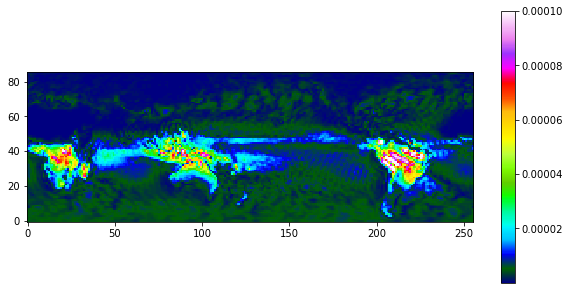

In [149]:
plt.figure(figsize = (10,10))
plt.imshow(res2[0], origin = 'lower', cmap = plt.get_cmap('gist_ncar'), vmax = 0.0001)
# plt.imshow(res[1], origin = 'lower', cmap = plt.get_cmap('twilight_r'))
plt.colorbar(shrink = 0.5)

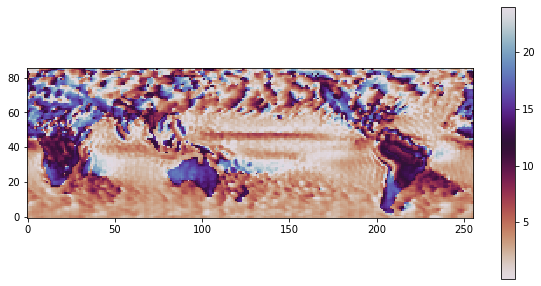

In [147]:
plt.figure(figsize = (10,10))
# plt.imshow(res[0], origin = 'lower', cmap = plt.get_cmap('gist_ncar'), vmax = 0.0001)
plt.imshow(res2[1], origin = 'lower', cmap = plt.get_cmap('twilight_r'))
plt.colorbar(shrink = 0.5)

In [146]:
plt.figure(figsize = (10,10))
# plt.imshow(res2[3], origin = 'lower', cmap = plt.get_cmap('twilight'), vmax = 24)
# plt.imshow(res2[2], origin = 'lower', cmap = plt.get_cmap('gist_ncar'), vmax = 0.00001, vmin = 0)
# plt.imshow(np.sqrt(res2[2])/ res2[1], origin = 'lower', cmap = plt.get_cmap('gist_ncar'), vmax = 0.0001)
# plt.imshow(np.sqrt(res2[3]), origin = 'lower', cmap = plt.get_cmap('gist_ncar'), vmax = 24)
plt.colorbar(shrink = 0.5)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 720x720 with 0 Axes>

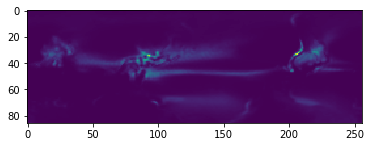

In [117]:
plt.imshow(res[2])

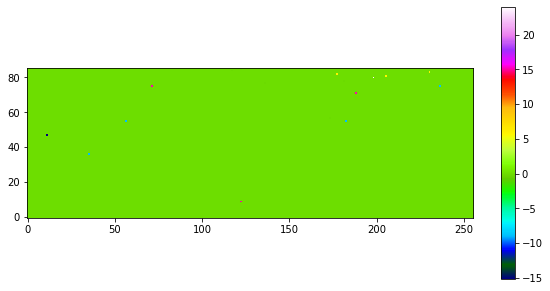

In [184]:
plt.figure(figsize = (10,10))
# plt.imshow(res[0], origin = 'lower', cmap = plt.get_cmap('gist_ncar'), vmax = 0.0001)
plt.imshow(res2[1] - res[1], origin = 'lower', cmap = plt.get_cmap('gist_ncar')) # vmax = .000000001)
plt.colorbar(shrink = 0.5)

In [193]:
# _ = plt.hist(res[0].flatten(), bins = 200)
# plt.xlim([0, 0.00001])
res2[1]

array([[ 3.3605973 ,  3.01623227,  2.73016639, ...,  3.06697583,
         3.75694089,  3.70715198],
       [ 3.22235149,  3.28806231,  3.17838407, ...,  2.77205748,
         3.38145343,  3.29759327],
       [ 3.41041595,  3.43759396,  3.38955217, ...,  2.58919204,
         3.20365454,  3.33062984],
       ...,
       [12.97321328, 23.1754335 ,  0.37696716, ..., 12.41951605,
        12.50974091, 11.62285663],
       [22.37159233,  0.24855363,  0.86450604, ..., 17.81709911,
        16.6820862 , 21.21397279],
       [ 1.3058148 ,  1.41103643,  1.05745384, ...,  0.51431236,
         2.31571648,  1.66574676]])

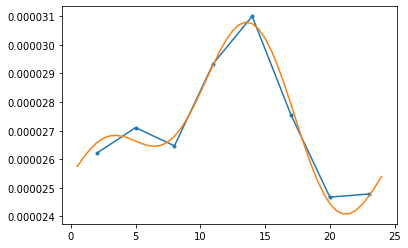

In [173]:
ts_loc = hour_means[:, 69, 100]

ts_loc_mean_sub = ts_loc - np.nanmean(ts_loc)
non_nan_inds = np.where(np.isfinite(ts_loc_mean_sub))
ts_loc_mean_sub_interp = ts_loc[non_nan_inds]
hour_bins_non_nan =  hour_bins[non_nan_inds]

params, params_covariance = optimize.curve_fit(cos_func_2_mode, 
                                               hour_bins_non_nan, 
                                               ts_loc_mean_sub_interp,
#                                                                p0=[ts_loc_mean_sub_interp.std(),
#                                                                    hour_bins_non_nan[np.nanargmax(ts_loc_mean_sub_interp)]],
                                               p0=[ts_loc_mean_sub_interp.std(),
                                                   hour_bins_non_nan[np.nanargmax(ts_loc_mean_sub_interp)],
                                                   ts_loc_mean_sub_interp.std(),
                                                   hour_bins_non_nan[np.nanargmax(ts_loc_mean_sub_interp)],

                                                  ],
                                                   maxfev=10000000)

plt.plot(hour_bins_non_nan, ts_loc_mean_sub_interp, '.-')
plt.plot(hour_bins, cos_func_2_mode(hour_bins, *params) + np.mean(ts_loc_mean_sub_interp) )



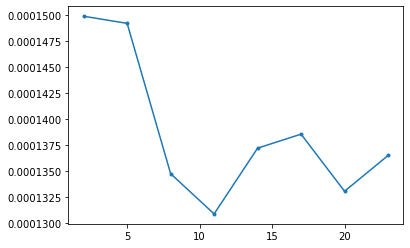

In [31]:
# plt.imshow(hour_means[4,:,:])

In [25]:
rand_ints_x = np.random.randint(0, high = hour_means.shape[2], size =200)
rand_ints_y = np.random.randint(0, high = hour_means.shape[1], size =200)

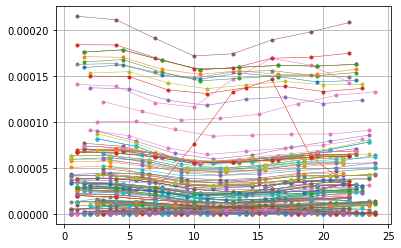

In [33]:
# hour_mean
# plt.imshow(hour_means[,:,:])
fig = plt.figure()
for rand_i in range(len(rand_ints_x)):
    ts_ = hour_means[:, 50, rand_ints_x[rand_i]]
    non_nan_inds = np.where(np.isfinite(ts_))
    ts_non_nan = ts_[non_nan_inds]
    hour_bins_non_nan = hour_bins[non_nan_inds]
    plt.plot(hour_bins_non_nan, ts_non_nan, 'o-', markersize = 3, linewidth = 0.5)
# plt.xlim([0,12])
plt.grid()
plt.show()

In [8]:
rel_data_dir = '/export/data1/cchristo/'
save_figs_dir = '/home/cchristo/proj_tapio/diurnal_research/figs/diurnal_cycle_figs/'

input_data_dir_cm5 = rel_data_dir  + 'diurnal_analysis_results/CMIP5/' #GFDL-ESM2M/'
input_data_dir_cm6  = rel_data_dir + 'diurnal_analysis_results/CMIP6/' #GFDL-ESM4/'
input_data_dir_gpm = rel_data_dir  + 'diurnal_analysis_results/GPM/'
land_sea_mask = rel_data_dir  + 'land_sea_masks/GLDAS_rg_gfdl_cm4.nc'
regrid_weights_dir = rel_data_dir + 'regridding_weights/'

In [14]:
os.listdir(input_data_dir_gpm)

['2000-06_2010-06_precip.nc', '2000-06_2010-06_precip_diurnal_means.nc']

In [10]:
ds_gpm = xr.open_dataset(input_data_dir_gpm +  '2000-06_2016-06_precip.nc')
ds_land_sea = xr.open_dataset(land_sea_mask)

ds_gpm['land_sea_mask'] = ds_land_sea['GLDAS_mask'].isel(time=0)
df_gpm = ds_gpm.to_dataframe()



FileNotFoundError: [Errno 2] No such file or directory: b'/export/data1/cchristo/diurnal_analysis_results/GPM/2000-06_2016-06_precip.nc'

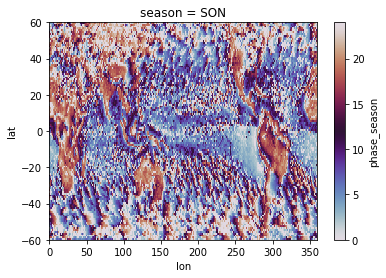

In [6]:
# ys
# ds_i.to_dataframe

# list(objs.values())[0]
# df
ds_gpm['phase_season'].isel(season = 3).plot.imshow(cmap = plt.get_cmap('twilight'), vmin = 0, vmax = 24)

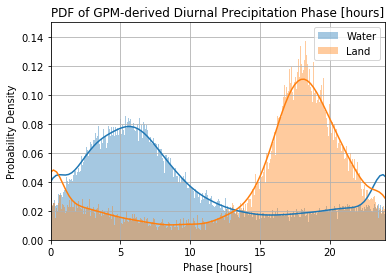

In [24]:
sns.distplot(df_gpm[df_gpm['land_sea_mask'] == 0]['phase_season'].values, label = 'Water', bins = 500)
sns.distplot(df_gpm[df_gpm['land_sea_mask'] == 1]['phase_season'].values, label = 'Land', bins = 500)
plt.xlim([0, 24])
plt.ylim([0, 0.15])
plt.xlabel('Phase [hours]')
plt.ylabel('Probability Density')
plt.title('PDF of GPM-derived Diurnal Precipitation Phase [hours]')
plt.grid()
plt.legend()
plt.savefig(save_figs_dir + 'GPM/' + 'phase_pdf_land_ocean.png', dpi = 300)

(0, 0.5)

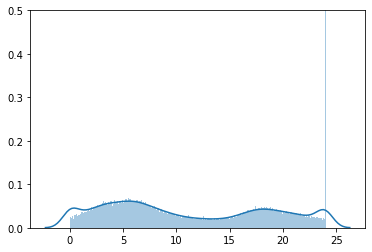

In [25]:
sns.distplot(df_gpm['phase_season'].values, label = 'Water', bins = 500)
plt.ylim([0, 0.5])


In [14]:
ds_gpm

<xarray.Dataset>
Dimensions:        (lat: 120, lon: 288, season: 4)
Coordinates:
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon            (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * lat            (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5 59.5
    time           datetime64[ns] 2000-01-01
Data variables:
    mu_season      (season, lat, lon) float64 0.05104 0.04867 ... 0.1119 0.1021
    sigma_season   (season, lat, lon) float64 0.05365 0.05108 ... 0.117 0.1053
    ampl_season    (season, lat, lon) float64 0.01687 0.01999 ... 0.01664
    phase_season   (season, lat, lon) float64 0.062 24.0 24.0 ... 21.55 24.0
    land_sea_mask  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [26]:
# input_data_dir = '/export/data1/cchristo/diurnal_analysis_results/GPM/'
# input_data_dir = '/export/data1/cchristo/diurnal_analysis_results/GPM/'

ds = xr.open_dataset(input_data_dir  + '2000-06_2010-06_precip.nc')
ds_diurnal_means = xr.open_dataset(input_data_dir + '2000-06_2010-06_precip_diurnal_means.nc')

NameError: name 'input_data_dir' is not defined

In [19]:
ds

<xarray.Dataset>
Dimensions:       (lat: 120, lon: 288, season: 4)
Coordinates:
  * season        (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon           (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * lat           (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5 59.5
Data variables:
    mu_season     (season, lat, lon) float64 ...
    sigma_season  (season, lat, lon) float64 ...
    ampl_season   (season, lat, lon) float64 ...
    phase_season  (season, lat, lon) float64 ...

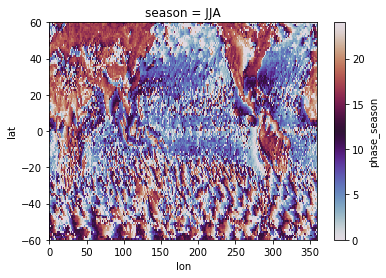

In [30]:
# ds.isel(season = 2)['mu_season'].plot.imshow(cmap = plt.get_cmap('gist_ncar')) 
ds_phase_i = ds.isel(season = 1)
ds_phase_i['phase_season'].plot.imshow(cmap = plt.get_cmap('twilight'), vmin = 0, vmax = 24)

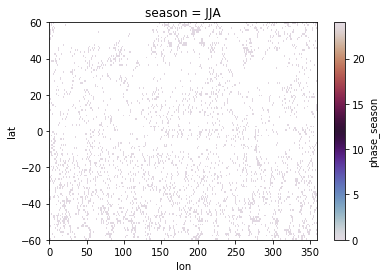

In [73]:
filter_d = (ds_phase_i['phase_season'] < 0.2) | (ds_phase_i['phase_season'] > 23.9)
ds_filt = ds_phase_i['phase_season'].where(filter_d)
ds_filt.plot.imshow(cmap = plt.get_cmap('twilight'), vmin = 0, vmax = 24)

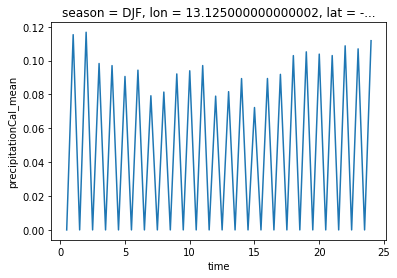

In [78]:
bad_ds = ds_diurnal_means.where((ds_phase_i['phase_season'] < 0.2) |
                                           (ds_phase_i['phase_season'] > 23.9))

bad_ds.isel(lat = 10, lon = 10, season=0)['precipitationCal_mean'].plot()
# bad_ds

In [94]:
ds_diurnal_means.isel(season =0, time = 1)['precipitationCal_mean'].max()

<xarray.DataArray 'precipitationCal_mean' ()>
array(2.13547978)
Coordinates:
    season   <U3 'DJF'
    time     float64 1.0

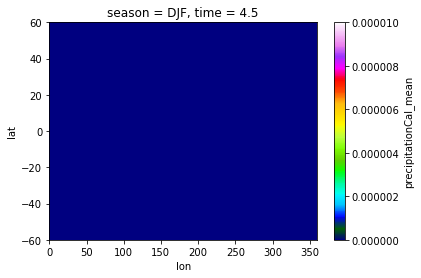

In [109]:
ds_diurnal_means.isel(season =0, time = 8)['precipitationCal_mean'].plot.imshow(vmax = 0.00001,
                                                                                cmap =plt.get_cmap('gist_ncar'))


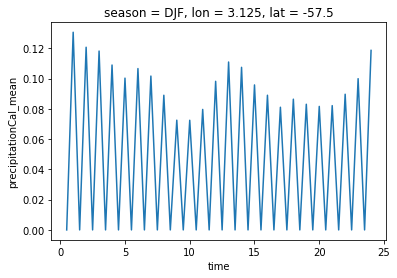

In [115]:
ds_diurnal_means.isel(season =0,lat = 2, lon = 2)['precipitationCal_mean'].plot()

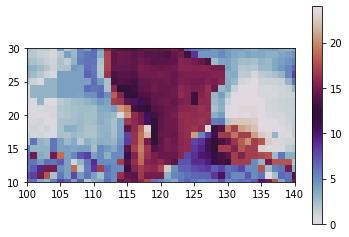

In [153]:
plt.imshow(ds.isel(season = 2)['phase_season'].values, origin = 'lower',
           cmap = plt.get_cmap('twilight'), vmin = 0, vmax = 24)
plt.axis([100,140, 10, 30])
plt.colorbar()

In [28]:
# make_four_panel(ds , 
#                 lats = ds['lat'].values, 
#                 lons = ds['lon'].values,
#                 vmin = 0, vmax = 24, 
#                 cmap = plt.get_cmap('twilight'),
#                 title = r'$\Phi$',
# #                 axis = plt.axis([220, 300, 10, 50]), 
#                 save_fig_path= None)

In [115]:
input_d_dir = '/export/data1/cchristo/diurnal_analysis_results/GPM_cp/'
ds_i = xr.open_dataset(input_d_dir + '2000-06_2010-06_precip.nc')
ds_i_means = xr.open_dataset(input_d_dir + '2000-06_2010-06_precip_diurnal_means.nc')

seas_ii = 0
field_ii = 'phase_season'

ds_i = ds_i.isel(season = seas_i)[field_ii]
ds_i_means = ds_i_means.isel(season = seas_i)['precipitationCal_mean']

In [58]:
# input_data_dir = '/export/data1/cchristo/diurnal_analysis_results/CMIP5/GFDL-ESM2M/'
model_n =  'GFDL-ESM2G/'
seas_ii = 1
field_ii = 'phase_season'

####### open cmip data
# ds_i = xr.open_dataset(input_data_dir_cm5 + model_n + '1985-01_2006-01_precip.nc')
# ds_i_means = xr.open_dataset(input_data_dir_cm5 + model_n + '1985-01_2006-01_precip_diurnal_means.nc')

# ds_i = ds_i.isel(season = seas_ii)[field_ii]
# ds_i_means = ds_i_means.isel(season = seas_ii)['pr_mean']


####### open GPM data

ds_i = ds_gpm.isel(season = seas_ii)[field_ii]
ds_i_means = xr.open_dataset(input_data_dir_gpm + '2000-06_2010-06_precip_diurnal_means.nc')

ds_i_means = ds_i_means.isel(season = seas_ii)['precipitationCal_mean']

In [54]:
ds_i_means

<xarray.DataArray 'precipitationCal_mean' (time: 48, lat: 120, lon: 288)>
[1658880 values with dtype=float64]
Coordinates:
    season   <U3 'DJF'
  * time     (time) float64 0.5 1.0 1.5 2.0 2.5 3.0 ... 22.0 22.5 23.0 23.5 24.0
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * lat      (lat) float64 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

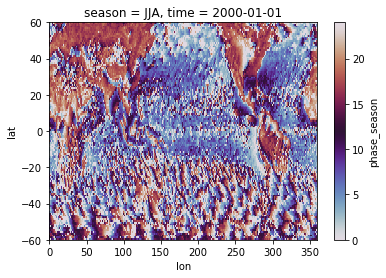

In [59]:
ds_i.plot.imshow(cmap = plt.get_cmap('twilight'))

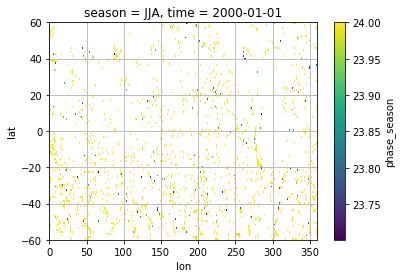

In [60]:
ds_i.where(abs(ds_i - 24) < 0.3).plot.imshow()
plt.grid()
# ds_i


In [61]:
ds_i_means

<xarray.DataArray 'precipitationCal_mean' (time: 48, lat: 120, lon: 288)>
[1658880 values with dtype=float64]
Coordinates:
    season   <U3 'JJA'
  * time     (time) float64 0.5 1.0 1.5 2.0 2.5 3.0 ... 22.0 22.5 23.0 23.5 24.0
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * lat      (lat) float64 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

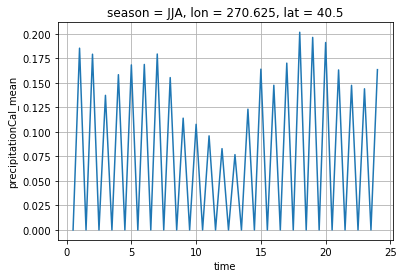

In [64]:
ds_i_means.sel(lat = 40, lon = 270, method = 'nearest').plot()
plt.grid()

In [63]:
ds_i_means.sel(lat = -26, lon = 205, method = 'nearest')

<xarray.DataArray 'precipitationCal_mean' (time: 48)>
array([0.206736, 0.      , 0.149693, 0.      , 0.14489 , 0.      , 0.145394,
       0.      , 0.120481, 0.      , 0.169585, 0.      , 0.191101, 0.      ,
       0.166894, 0.      , 0.211886, 0.      , 0.146765, 0.      , 0.166119,
       0.      , 0.158223, 0.      , 0.151397, 0.      , 0.189001, 0.      ,
       0.176653, 0.      , 0.1794  , 0.      , 0.206682, 0.      , 0.182925,
       0.      , 0.266142, 0.      , 0.193016, 0.      , 0.140531, 0.      ,
       0.131324, 0.      , 0.132008, 0.      , 0.209483, 0.      ])
Coordinates:
    season   <U3 'JJA'
  * time     (time) float64 0.5 1.0 1.5 2.0 2.5 3.0 ... 22.0 22.5 23.0 23.5 24.0
    lon      float64 205.6
    lat      float64 -25.5

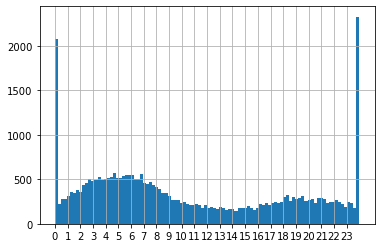

In [52]:
# ds_i['phase_season'].plot(bins = 80)
_ = plt.hist(ds_i.values.flatten(), bins = 100)
plt.xticks(np.arange(0, 24, 1.0))
plt.grid()

In [158]:
input_data_dir = '/export/data1/cchristo/diurnal_analysis_results/GPM_prev/'

os.listdir(input_data_dir)
ds_gpm = xr.open_dataset(input_data_dir  + '2000-06_2001-06_precip.nc')
ds_diurnal_means_gpm = xr.open_dataset(input_data_dir  + '2000-06_2001-06_precip_diurnal_means.nc')

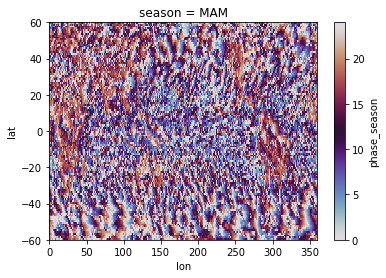

In [174]:
# ds.isel(season = 1)['mu_season'].plot.imshow(cmap = plt.get_cmap('gist_ncar')) 
ds_gpm.isel(season = 2)['phase_season'].plot.imshow(cmap = plt.get_cmap('twilight'), vmin = 0, vmax = 24)